# 라이브러리 및 모듈 호출

In [1]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

# 데이터 불러오기

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


# 데이터 확인

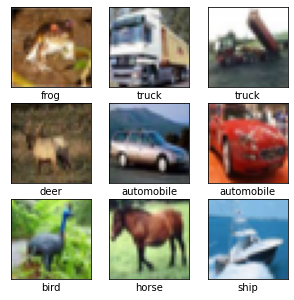

In [4]:
np.random.seed(3)

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize=(5,5))
for i , idx in enumerate(random_idx):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[int(y_train[i])])
plt.show()

# 데이터 전처리

In [5]:
x_mean = np.mean(x_train, axis=(0,1,2)) # rgb 채널별로 평균과 표준편차 구하기
x_std = np.std(x_train, axis=(0,1,2))

x_train = (x_train-x_mean)/x_std
x_test = (x_test-x_mean)/x_std

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)

print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

(35000, 32, 32, 3) 35000
(15000, 32, 32, 3) 15000


# 모델 구성 및 컴파일

In [10]:
model = Sequential()
model.add(Conv2D(32,3,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(32,3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(128,3,padding='same',activation='relu'))
model.add(Conv2D(128,3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(0.0001),loss='sparse_categorical_crossentropy',metrics=['acc'])

# 모델 학습

In [11]:
history = model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/30
1094/1094 [==============================] - 15s 13ms/step - loss: 1.6356 - acc: 0.4093 - val_loss: 1.3895 - val_acc: 0.4939
Epoch 2/30
1094/1094 [==============================] - 14s 13ms/step - loss: 1.2820 - acc: 0.5444 - val_loss: 1.2386 - val_acc: 0.5589
Epoch 3/30
1094/1094 [==============================] - 15s 14ms/step - loss: 1.1098 - acc: 0.6075 - val_loss: 1.0916 - val_acc: 0.6169
Epoch 4/30
1094/1094 [==============================] - 15s 13ms/step - loss: 0.9841 - acc: 0.6575 - val_loss: 1.0099 - val_acc: 0.6452
Epoch 5/30
1094/1094 [==============================] - 15s 14ms/step - loss: 0.8816 - acc: 0.6944 - val_loss: 0.9610 - val_acc: 0.6682
Epoch 6/30
1094/1094 [==============================] - 14s 13ms/step - loss: 0.7943 - acc: 0.7248 - val_loss: 0.9106 - val_acc: 0.6865
Epoch 7/30
1094/1094 [==============================] - 13s 12ms/step - loss: 0.7128 - acc: 0.7525 - val_loss: 0.8603 - val_acc: 0.6978
Epoch 8/30
1094/1094 [==========================

# 학습 과정 시각화

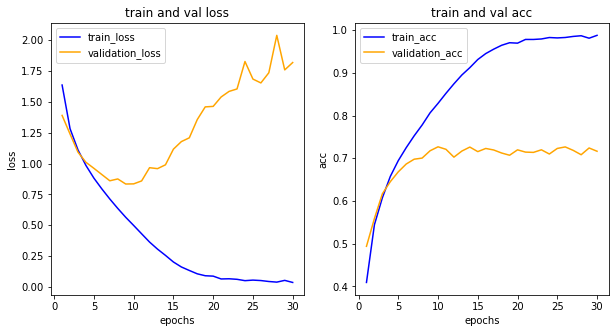

In [12]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1,len(loss)+1)
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='b', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='validation_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color='b', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='validation_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

# 신경망 시각화

C:\Users\user\AppData\Local\Temp/ipykernel_19916/1955728467.py:19: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


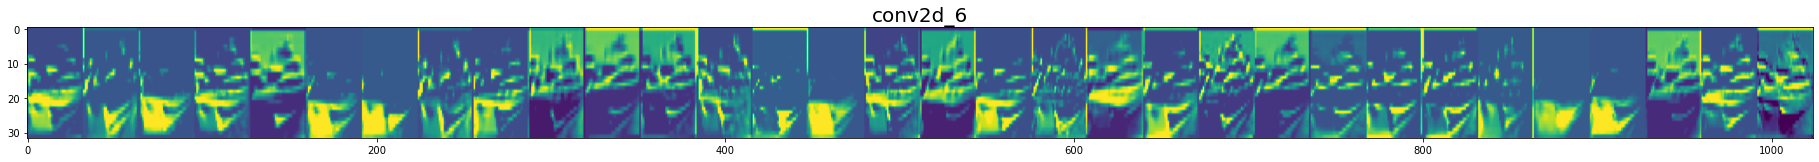

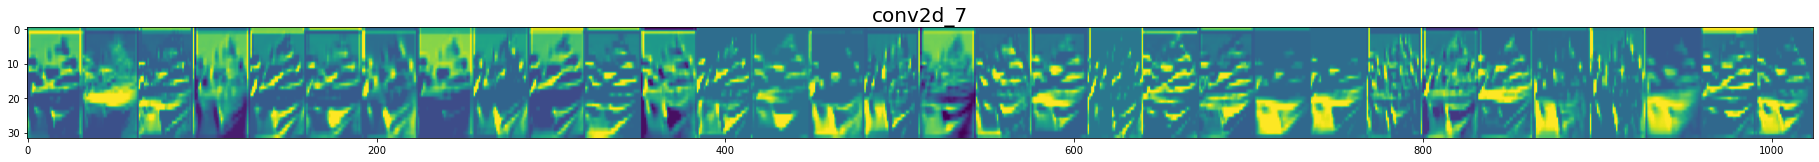

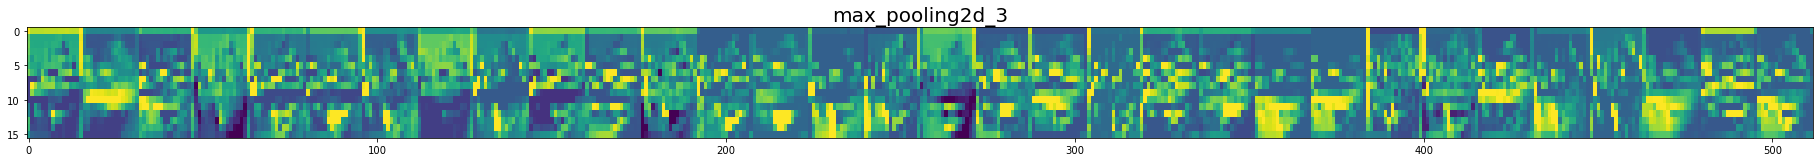

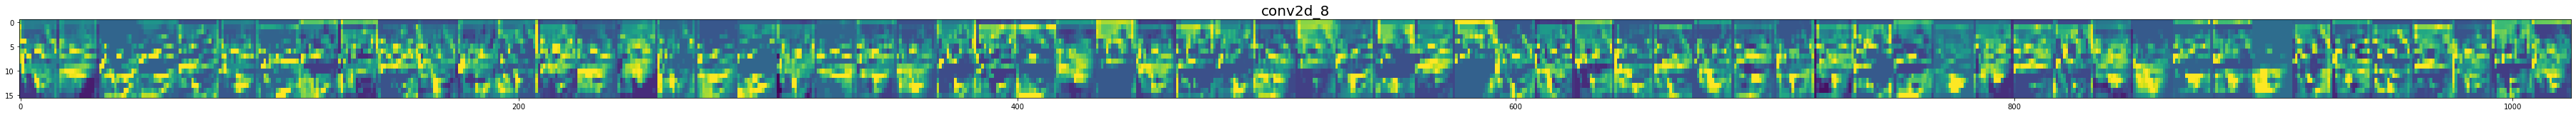

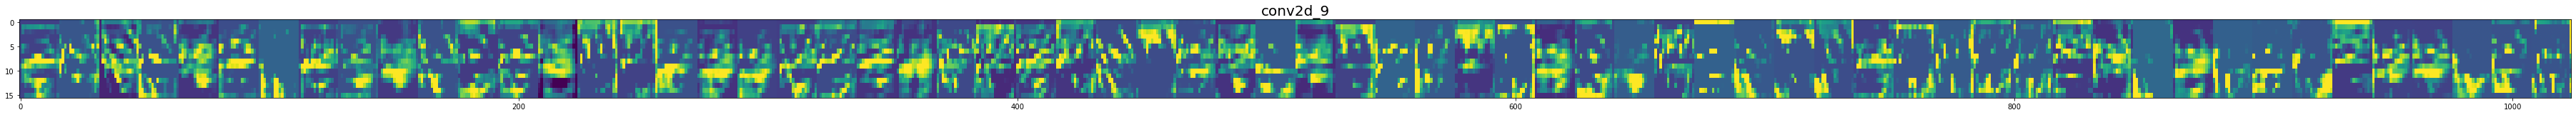

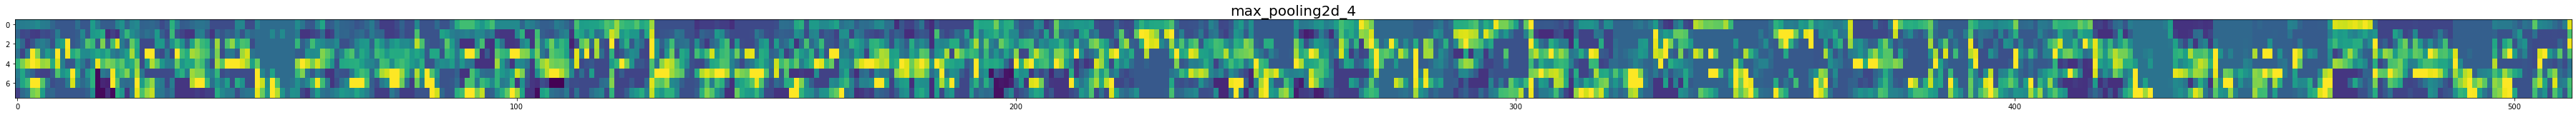

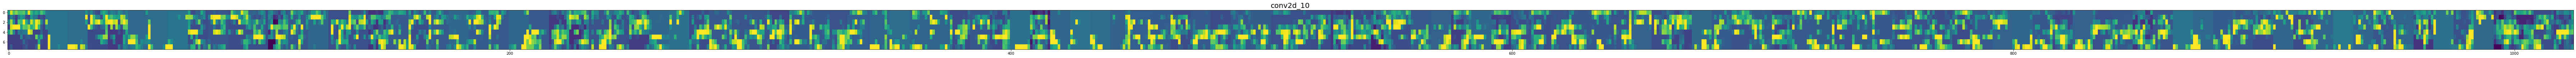

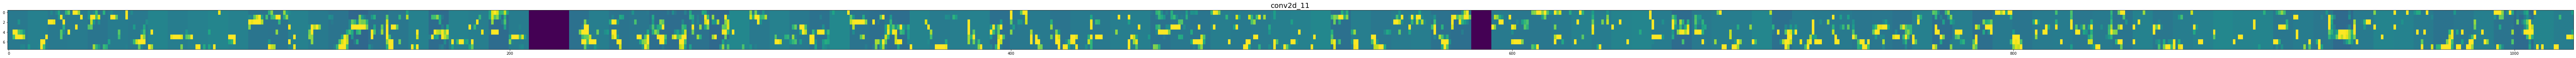

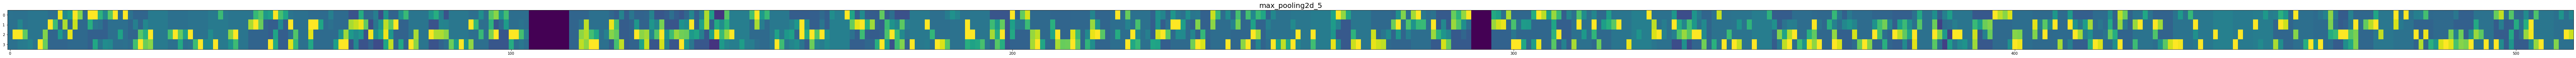

In [13]:
get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]

visual_model = tf.keras.models.Model(inputs=model.input, outputs=get_output)

test_img = np.expand_dims(x_test[1], axis=0)
feature_maps = visual_model.predict(test_img)

for layer_name, feature_map in zip(get_layer_name, feature_maps):
    if(len(feature_map.shape)==4):
        img_size = feature_map.shape[1]
        features = feature_map.shape[-1]
        
        display_grid = np.zeros((img_size, img_size*features))
        
        for i in range(features):
            x = feature_map[0,:,:,i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x,0,255).astype('uint8')
            display_grid[:, i*img_size:(i+1)*img_size] = x
        
        plt.figure(figsize=(features, 2+1./features))
        plt.title(layer_name, fontsize=20)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

# 과적합 방지 : 규제

Epoch 1/30
1094/1094 [==============================] - 15s 13ms/step - loss: 1.8301 - acc: 0.4047 - val_loss: 1.5719 - val_acc: 0.5014
Epoch 2/30
1094/1094 [==============================] - 13s 12ms/step - loss: 1.4650 - acc: 0.5412 - val_loss: 1.3949 - val_acc: 0.5565
Epoch 3/30
1094/1094 [==============================] - 13s 12ms/step - loss: 1.2835 - acc: 0.6099 - val_loss: 1.2345 - val_acc: 0.6267
Epoch 4/30
1094/1094 [==============================] - 13s 12ms/step - loss: 1.1475 - acc: 0.6563 - val_loss: 1.1964 - val_acc: 0.6404
Epoch 5/30
1094/1094 [==============================] - 13s 12ms/step - loss: 1.0388 - acc: 0.6937 - val_loss: 1.0974 - val_acc: 0.6735
Epoch 6/30
1094/1094 [==============================] - 13s 12ms/step - loss: 0.9538 - acc: 0.7225 - val_loss: 1.0742 - val_acc: 0.6843
Epoch 7/30
1094/1094 [==============================] - 13s 12ms/step - loss: 0.8729 - acc: 0.7501 - val_loss: 1.0128 - val_acc: 0.7028
Epoch 8/30
1094/1094 [==========================

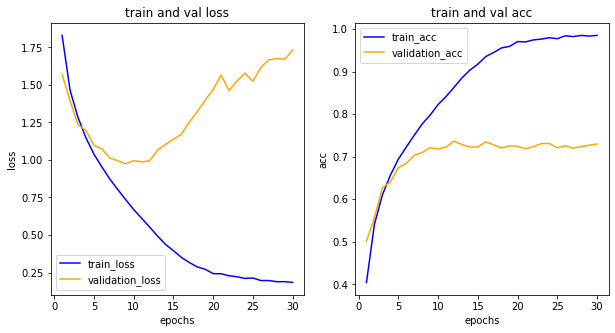

In [14]:
# 위의 과정에서 kernel_regulizer 옵션만 추가
model = Sequential()
model.add(Conv2D(32,3,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(32,3,padding='same',activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(Conv2D(64,3,padding='same',activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(128,3,padding='same',activation='relu'))
model.add(Conv2D(128,3,padding='same',activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=Adam(0.0001),loss='sparse_categorical_crossentropy',metrics=['acc'])
history = model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_val,y_val))

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1,len(loss)+1)
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='b', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='validation_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color='b', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='validation_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

# 과적합 방지 : 드롭아웃

Epoch 1/30
1094/1094 [==============================] - 14s 12ms/step - loss: 1.7037 - acc: 0.3756 - val_loss: 1.4506 - val_acc: 0.4662
Epoch 2/30
1094/1094 [==============================] - 14s 12ms/step - loss: 1.3658 - acc: 0.5073 - val_loss: 1.2400 - val_acc: 0.5557
Epoch 3/30
1094/1094 [==============================] - 14s 12ms/step - loss: 1.2151 - acc: 0.5642 - val_loss: 1.1326 - val_acc: 0.5971
Epoch 4/30
1094/1094 [==============================] - 13s 12ms/step - loss: 1.0988 - acc: 0.6072 - val_loss: 1.0275 - val_acc: 0.6405
Epoch 5/30
1094/1094 [==============================] - 13s 12ms/step - loss: 1.0087 - acc: 0.6428 - val_loss: 0.9652 - val_acc: 0.6587
Epoch 6/30
1094/1094 [==============================] - 13s 12ms/step - loss: 0.9297 - acc: 0.6723 - val_loss: 0.9324 - val_acc: 0.6751
Epoch 7/30
1094/1094 [==============================] - 13s 12ms/step - loss: 0.8688 - acc: 0.6965 - val_loss: 0.8550 - val_acc: 0.7029
Epoch 8/30
1094/1094 [==========================

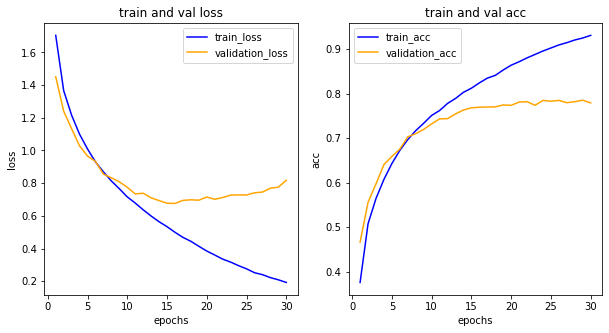

In [15]:
# 이전 과정에서 드롭아웃층만 추가
model = Sequential()
model.add(Conv2D(32,3,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(32,3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128,3,padding='same',activation='relu'))
model.add(Conv2D(128,3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=Adam(0.0001),loss='sparse_categorical_crossentropy',metrics=['acc'])
history = model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_val,y_val))

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1,len(loss)+1)
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='b', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='validation_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color='b', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='validation_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

# 과적합 방지 : 배치정규화

Epoch 1/30
1094/1094 [==============================] - 19s 16ms/step - loss: 1.4162 - acc: 0.4988 - val_loss: 1.1607 - val_acc: 0.5889
Epoch 2/30
1094/1094 [==============================] - 17s 16ms/step - loss: 1.0022 - acc: 0.6537 - val_loss: 1.0255 - val_acc: 0.6395
Epoch 3/30
1094/1094 [==============================] - 17s 15ms/step - loss: 0.7979 - acc: 0.7257 - val_loss: 0.9507 - val_acc: 0.6673
Epoch 4/30
1094/1094 [==============================] - 18s 16ms/step - loss: 0.6388 - acc: 0.7865 - val_loss: 0.9249 - val_acc: 0.6765
Epoch 5/30
1094/1094 [==============================] - 19s 18ms/step - loss: 0.5093 - acc: 0.8356 - val_loss: 0.9642 - val_acc: 0.6723
Epoch 6/30
1094/1094 [==============================] - 18s 17ms/step - loss: 0.3960 - acc: 0.8790 - val_loss: 0.9321 - val_acc: 0.6873
Epoch 7/30
1094/1094 [==============================] - 19s 17ms/step - loss: 0.2936 - acc: 0.9171 - val_loss: 0.9597 - val_acc: 0.6923
Epoch 8/30
1094/1094 [==========================

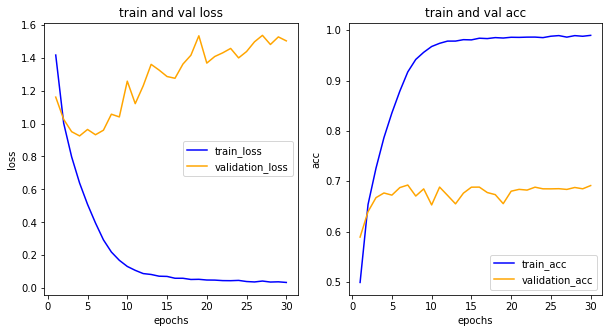

In [16]:
# 이전 과정에서 배치정규화층 추가, 활성화함수층 따로 추가
model = Sequential()
model.add(Conv2D(32,3,padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32,3,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(64,3,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64,3,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(128,3,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128,3,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=Adam(0.0001),loss='sparse_categorical_crossentropy',metrics=['acc'])
history = model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_val,y_val))

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1,len(loss)+1)
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='b', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='validation_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color='b', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='validation_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

# 이미지 제너레이터

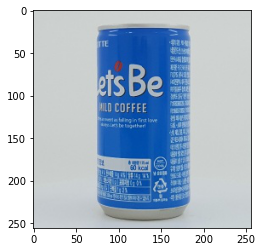

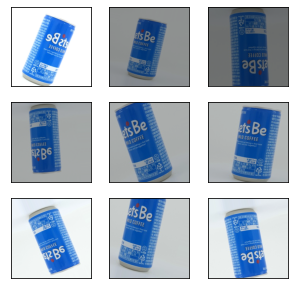

In [20]:
# 제너레이터 생성된 이미지 확인
train_datagen = ImageDataGenerator(horizontal_flip = True,
                                  vertical_flip = True,
                                  shear_range = 0.5,
                                  brightness_range = [0.5, 1.5],
                                  zoom_range = 0.2,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1,
                                  rotation_range = 30,
                                  fill_mode = 'nearest')

cancoffee = img_to_array(load_img('e:/10018_1.jpg')).astype(np.uint8)
plt.figure()
plt.imshow(cancoffee)

cancoffee = cancoffee.reshape((1,)+cancoffee.shape)
train_generator = train_datagen.flow(cancoffee, batch_size=1)

plt.figure(figsize=(5,5))
for i in range(9):
    data = next(train_generator)
    image = data[0]
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(image, dtype=np.uint8), cmap='gray')
plt.show()

In [19]:
# 이미지 제너레이터를 활용해 학습 진행
y_train_reshape = tf.reshape(y_train, (-1)) # 책에 이부분없는데 이거없으면 학습 제대로 진행 안됨(정확도가 0.1근처에서 안올라감)
y_val_reshape = tf.reshape(y_val, (-1)) # stackoverflow에서 손실함수로 sparse 범주형 교차엔트로피 써서 그런거라고함
train_datagen = ImageDataGenerator(horizontal_flip = True,
                                  zoom_range = 0.2,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1,
                                  rotation_range = 30,
                                  fill_mode = 'nearest')
val_datagen = ImageDataGenerator()
batch_size = 32

train_generator = train_datagen.flow(x_train, y_train_reshape, batch_size=batch_size)
val_generator = val_datagen.flow(x_val, y_val_reshape, batch_size=batch_size)

In [20]:
model = Sequential()
model.add(Conv2D(32,3,padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32,3,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(64,3,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64,3,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(128,3,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128,3,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=Adam(0.0001),loss='sparse_categorical_crossentropy',metrics=['acc'])

def get_step(train_len, batch_size):
    if(train_len % batch_size > 0):
        return train_len // batch_size + 1
    else:
        return train_len // batch_size

history = model.fit(train_generator,epochs = 30,
                    steps_per_epoch = get_step(len(x_train), batch_size),
                    validation_data = val_generator,
                    validation_steps = get_step(len(x_val), batch_size))

Epoch 1/30
1094/1094 [==============================] - 25s 21ms/step - loss: 1.6102 - acc: 0.4226 - val_loss: 1.4174 - val_acc: 0.5081
Epoch 2/30
1094/1094 [==============================] - 23s 21ms/step - loss: 1.3492 - acc: 0.5173 - val_loss: 1.1704 - val_acc: 0.5863
Epoch 3/30
1094/1094 [==============================] - 23s 21ms/step - loss: 1.2302 - acc: 0.5648 - val_loss: 1.2489 - val_acc: 0.5715
Epoch 4/30
1094/1094 [==============================] - 24s 22ms/step - loss: 1.1427 - acc: 0.5951 - val_loss: 1.1339 - val_acc: 0.6087
Epoch 5/30
1094/1094 [==============================] - 25s 23ms/step - loss: 1.0757 - acc: 0.6199 - val_loss: 0.9958 - val_acc: 0.6544
Epoch 6/30
1094/1094 [==============================] - 24s 22ms/step - loss: 1.0314 - acc: 0.6340 - val_loss: 0.9440 - val_acc: 0.6743
Epoch 7/30
1094/1094 [==============================] - 24s 22ms/step - loss: 0.9797 - acc: 0.6571 - val_loss: 0.9747 - val_acc: 0.6629
Epoch 8/30
1094/1094 [==========================

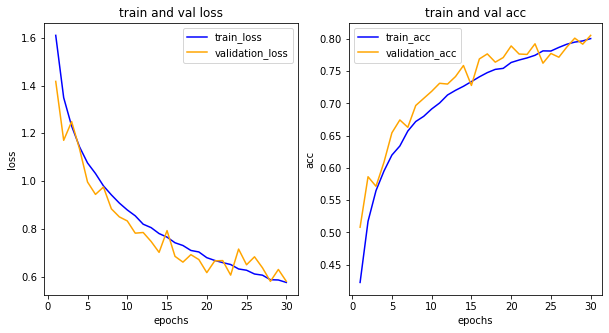

In [21]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1,len(loss)+1)
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='b', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='validation_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color='b', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='validation_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()